In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_name = 'episodic_data_2024_06_19_11_26_13.csv'
df = pd.read_csv(file_name)
df = df.dropna()

df.head()

,Average Episodic Length,Average Episodic Return,Average Actor Loss,Timesteps So Far,Time Elapsed
0,92.78,352.25,-0.00660,2134,11.15
1,102.60,340.77,-0.00272,4186,11.79
2,80.08,243.12,-0.00785,6268,12.73
3,87.54,208.84,-0.00581,8369,12.90
4,114.50,253.87,-0.00417,10430,12.40


In [4]:
print(df.columns)

Index(['Average Episodic Length', 'Average Episodic Return',
       'Average Actor Loss', 'Timesteps So Far', 'Time Elapsed'],
      dtype='object')


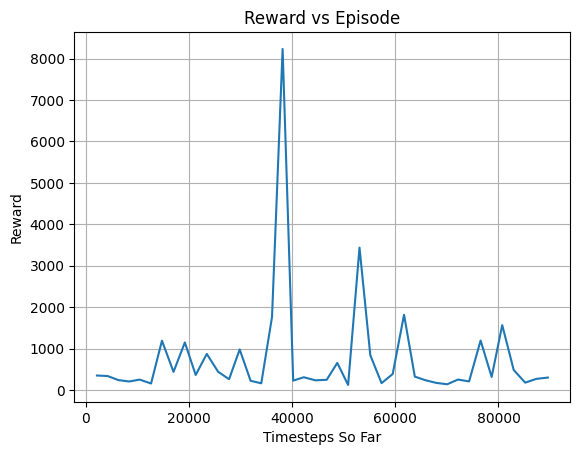

In [6]:
fig, ax = plt.subplots()
ax.plot(df['Timesteps So Far'], df['Average Episodic Return'])
ax.set(xlabel='Timesteps So Far', ylabel='Reward',
       title='Reward vs Episode')
ax.grid()
plt.show()


# Reward repartition


In [18]:
file_name = 'reward.csv'
df = pd.read_csv(file_name, names=['collision_reward', 'near_collision_reward','speed_reward','angular_reward','proximity_reward','total_reward'])
# only keep the first 400
df = df[:400]

df.head()

,collision_reward,near_collision_reward,speed_reward,angular_reward,proximity_reward,total_reward
0,0,0,-1.585447,-1.208885,-0.254678,-3.049010
1,0,0,-0.036071,-0.053614,-0.342062,-0.431747
2,0,0,4.638233,1.139753,-0.350523,5.427464
3,0,0,2.182861,1.895350,-0.344876,3.733336
4,0,0,1.698212,1.544102,-0.344242,2.898072


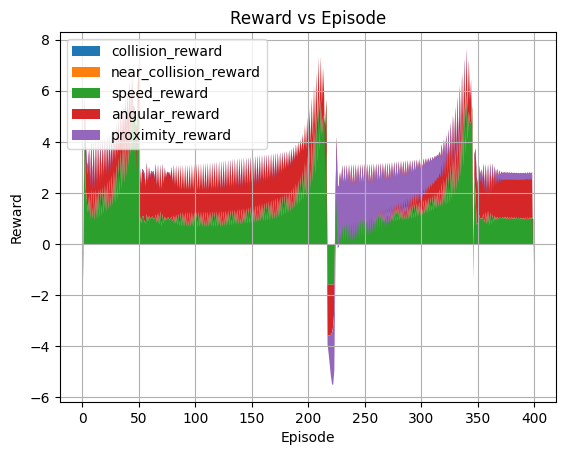

In [19]:
fig, ax = plt.subplots()
ax.stackplot(df.index, df['collision_reward'], df['near_collision_reward'], df['speed_reward'], df['angular_reward'], df['proximity_reward'], labels=['collision_reward', 'near_collision_reward','speed_reward','angular_reward','proximity_reward'])
ax.set(xlabel='Episode', ylabel='Reward',
         title='Reward vs Episode')
ax.legend(loc='upper left')
ax.grid()
plt.show()